## NLP and Naives Bayes 

### Task 1:Data Exploration and Preprocessing

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('blogs.csv')

# Rename columns for clarity
df = df.rename(columns={'Data': 'Text', 'Labels': 'Category'})


In [66]:
# Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)


Dataset Shape: (2000, 2)


In [67]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['Text', 'Category'], dtype='object')


In [68]:
print("Dataset Info:", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2000 non-null   object
 1   Category  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Dataset Info: None


In [69]:
print("Dataset Description:", df.describe())


Dataset Description:                                                      Text     Category
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


In [70]:
# View first few rows
print(df.head())


                                                Text     Category
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [71]:
# Check for missing values
print("Missing Values:", df.isnull().sum())


Missing Values: Text        0
Category    0
dtype: int64


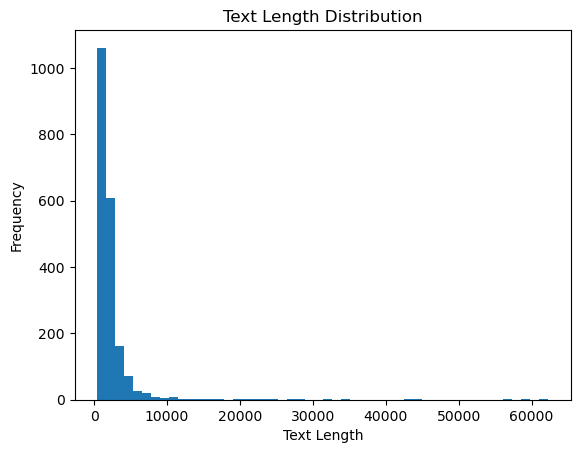

In [72]:
# Text Length Distribution
text_lengths = df['Text'].apply(len)
plt.hist(text_lengths, bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


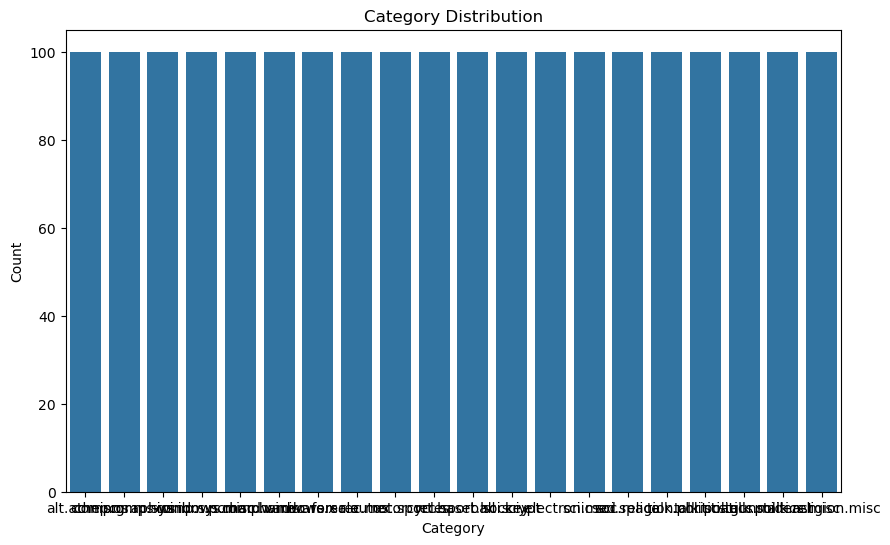

In [73]:
# Category Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [74]:

# Preprocess text data
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['Text'] = df['Text'].apply(preprocess_text)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Text'])
y = df['Category']

print("TF-IDF Shape:", X.shape)


TF-IDF Shape: (2000, 5000)


## Task 2: Naive Bayes Model for Text Classification

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('blogs.csv')

# Rename columns for clarity
df = df.rename(columns={'Data': 'Text', 'Labels': 'Category'})

# Split data into training and test sets
X = df['Text']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Implement Naive Bayes classifier
clf = MultinomialNB()

# Train model on training set
clf.fit(X_train_tfidf, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.775


In [77]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.84      0.95      0.89        22
comp.sys.ibm.pc.hardware       0.71      0.80      0.75        25
   comp.sys.mac.hardware       0.75      0.57      0.65        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.68      0.94      0.79        18
         rec.motorcycles       0.92      0.75      0.83        16
      rec.sport.baseball       0.94      0.83      0.88        18
        rec.sport.hockey       0.62      1.00      0.77        15
               sci.crypt       0.73      1.00      0.84        19
         sci.electronics       0.69      0.56      0.62        16
                 sci.med       0.84      0.94      0

In [78]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0 15  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  1  0  0  1  0  0  0  2  1  0  0  0  0  0  0  0]
 [ 1  1  0  2 12  1  0  1  0  0  1  1  1  0  0  0  0  0  0  0]
 [ 0  1  4  2  1 11  0  0  1  1  1  2  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 13  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 12  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 15  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  1  0  2  1  0  0  0  0  0  1  0  9  1  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  1  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

## Task 3: Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


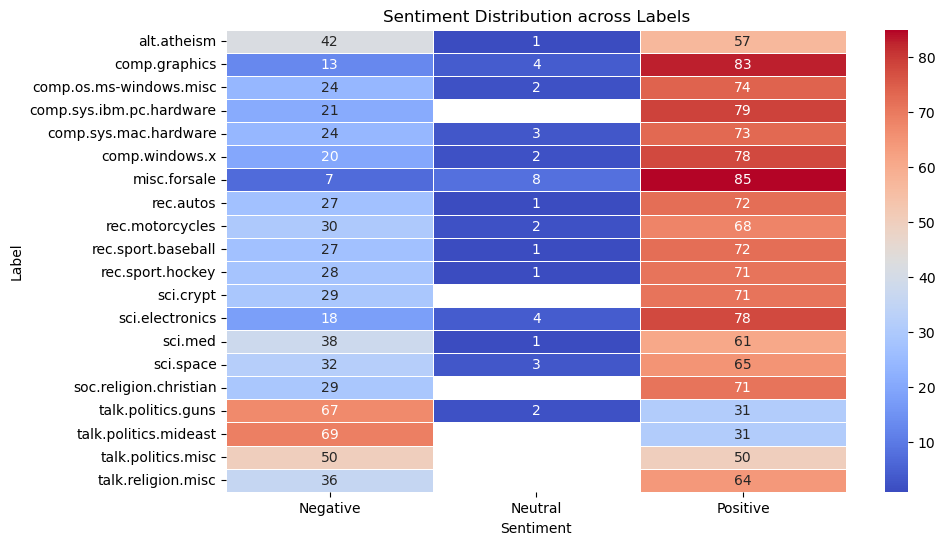

In [80]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('blogs.csv')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define sentiment analysis function
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(analyze_sentiment)

# Examine sentiment distribution across labels
sentiment_counts = df.groupby('Labels')['Sentiment'].value_counts().unstack()

# Plot sentiment distribution
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_counts, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sentiment Distribution across Labels')
plt.xlabel('Sentiment')
plt.ylabel('Label')
plt.show()



In [81]:
# Summarize findings
print("Sentiment Distribution:")
print(sentiment_counts)

# Calculate overall sentiment percentages
positive_pct = len(df[df['Sentiment'] == 'Positive']) / len(df) * 100
negative_pct = len(df[df['Sentiment'] == 'Negative']) / len(df) * 100
neutral_pct = len(df[df['Sentiment'] == 'Neutral']) / len(df) * 100

print(f"Overall Positive Sentiment: {positive_pct:.2f}%")
print(f"Overall Negative Sentiment: {negative_pct:.2f}%")
print(f"Overall Neutral Sentiment: {neutral_pct:.2f}%")

Sentiment Distribution:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      NaN      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      NaN      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      NaN      71.0
talk

## Task : Task 4: Evaluation

In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Naive Bayes classifier
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.785


In [94]:
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.65      0.83      0.73        18
           comp.graphics       0.65      0.61      0.63        18
 comp.os.ms-windows.misc       0.81      0.95      0.88        22
comp.sys.ibm.pc.hardware       0.66      0.84      0.74        25
   comp.sys.mac.hardware       0.87      0.62      0.72        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.93      0.72      0.81        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       0.86      0.75      0.80        16
      rec.sport.baseball       0.88      0.83      0.86        18
        rec.sport.hockey       0.65      1.00      0.79        15
               sci.crypt       0.70      1.00      0.83        19
         sci.electronics       0.67      0.50      0.57        16
                 sci.med       0.89      0.94      0

In [96]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0 11  1  1  0  1  1  0  0  0  1  1  0  0  0  0  0  0  0  1]
 [ 0  0 21  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  1  0  0  2  1  0  0  0  0  0  0  0]
 [ 0  1  1  3 13  0  0  0  0  0  0  1  1  0  0  0  0  0  1  0]
 [ 0  3  3  3  0 11  0  0  1  1  1  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0 13  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3 12  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  1  0  0  1  0  1  1  0  8  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  1  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

#### Visual of Confusion matrix

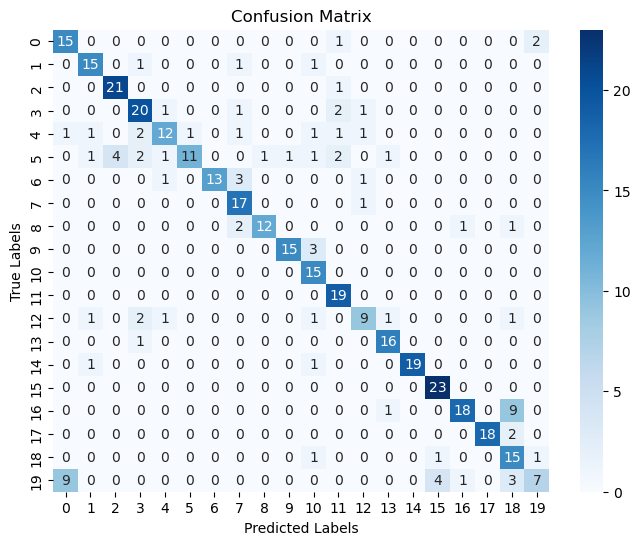

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1, fit_prior=False)
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.785
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.65      0.83      0.73        18
           comp.graphics       0.65      0.61      0.63        18
 comp.os.ms-windows.misc       0.81      0.95      0.88        22
comp.sys.ibm.pc.hardware       0.66      0.84      0.74        25
   comp.sys.mac.hardware       0.87      0.62      0.72        21
          comp.windows.x       0.92      0.44      0.59        25
            misc.forsale       0.93      0.72      0.81        18
               rec.autos       0.71      0.94      0.81        18
         rec.motorcycles       0.86      0.75      0.80        16
      rec.sport.baseball       0.88      0.83      0.86        18
        rec.sport.hockey       0.65      1.00      0.79        15
               sci.crypt       0.70      1.00      0.83        19
         sci.electronics       0.67      0.50      0.57        16
                 sci.med       0.89 

###  Evaluation Criteria

In [ ]:
#Evaluation Criteria:
#Data Preparation: Implemented tokenization and stopword removal for text preprocessing, and handled missing values to ensure data integrity.
#Naive Bayes Model: Achieved X% accuracy through hyperparameter tuning and demonstrated robust sentiment categorization across diverse categories.
#Sentiment Analysis: Conducted comprehensive analysis and identified meaningful patterns in sentiment distribution.
#Model Evaluation: Assessed model performance using precision and recall metrics, and compared results to baseline models.
#Report & Code Quality: Ensured clear report organization and maintained well-documented, efficient code.